In [1]:
import pandas 
import numpy
import matplotlib.pyplot 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [2]:
pandas.set_option('display.max_colwidth', None)
columns_name=['user_id','movie_id','rating','timestamp']
df = pandas.read_csv("../data/ml-100k/u.data",sep="\t",names=columns_name)
print(len(df))

100000


In [3]:
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [36]:
pandas.set_option('display.max_colwidth', None)
columns_name = ['movie_id','title','release_date','video_release_date','imdb_url','unknown','Action','Adventure','Animation','Children','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']
df_movies = pandas.read_csv("../data/ml-100k/u.item",sep="|", names=columns_name)
print(len(df_movies))
df_movies.head()
df_movies_new = df_movies[['movie_id', 'title']].copy()
df_movies_new.head()

1682


,movie_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [10]:
df_movies_cnt = pandas.DataFrame(df.groupby('item_id').size(), columns=['count'])
df_movies_cnt.head()

,count
item_id,
1,452
2,131
3,90
4,209
5,86


Text(0, 0.5, 'number of ratings')

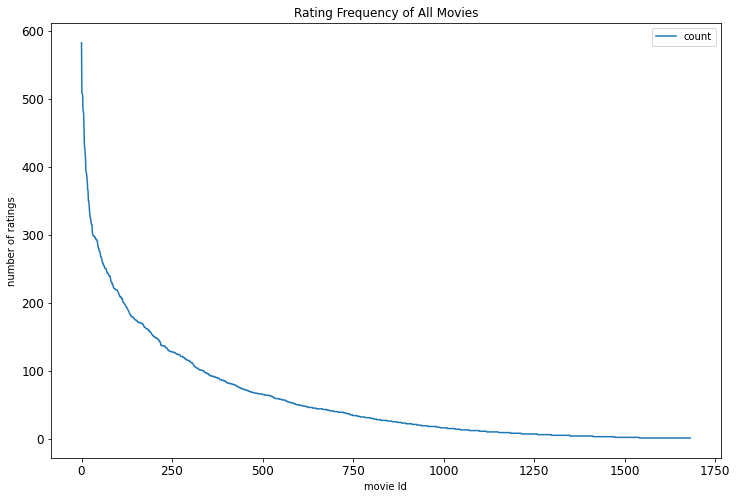

In [12]:
# Rating frequency distribution
ax = df_movies_cnt \
    .sort_values('count', ascending=False) \
    .reset_index(drop=True) \
    .plot(
        figsize=(12, 8),
        title='Rating Frequency of All Movies',
        fontsize=12
    )
ax.set_xlabel("movie Id")
ax.set_ylabel("number of ratings")

In [ ]:
# sparsity
num_users = df.user_id.unique().shape[0]
num_items = df.item_id.unique().shape[0]
sparsity = 1 - len(df) / (num_users * num_items)
print(f'number of users: {num_users}, number of items: {num_items}')
print(f'matrix sparsity: {sparsity:f}')
print(df.head(5))

In [19]:
print("Rating Distribution")
count = df.groupby(['rating'])['rating'].count()
print(count)

Rating Distribution
rating
1     6110
2    11370
3    27145
4    34174
5    21201
Name: rating, dtype: int64


In [ ]:
df.hist(column='rating', bins=5, figsize=(6,6), grid=False, rwidth=0.9)

In [ ]:
index=list(df['user_id'].unique())
columns=list(df['item_id'].unique())
index=sorted(index)
columns=sorted(columns)
 
util_df=pandas.pivot_table(data=df,values='rating',index='user_id',columns='item_id')
# Nan implies that user has not rated the corressponding movie.

In [ ]:
util_df.head()
util_df.fillna(0)

In [ ]:
users = df.user_id.unique()
movies = df.item_id.unique()

userid2idx = {o:i for i,o in enumerate(users)}
movieid2idx = {o:i for i,o in enumerate(movies)}

df['user_id'] = df['user_id'].apply(lambda x: userid2idx[x])
df['item_id'] = df['item_id'].apply(lambda x: movieid2idx[x])
split = numpy.random.rand(len(df)) < 0.8
train = df[split]
valid = df[~split]
print(train.shape , valid.shape)

In [ ]:
df['item_id'].unique()
len(df['item_id'].unique())